In [636]:
# importing all the tools we need
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#models for scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay


In [637]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [639]:
df["RoomService"].mean()

224.687617481203

In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

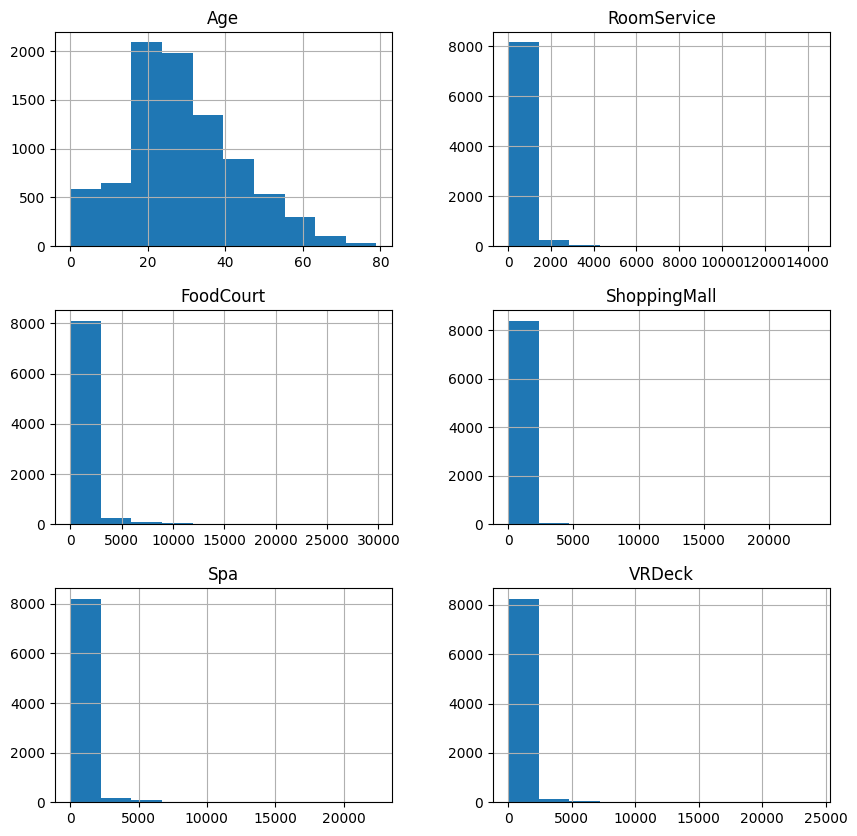

In [641]:
df.hist(figsize=(10, 10))

In [642]:
len(df.columns)

14

In [643]:
# generic function to fill missing data --can be modified later for better general use
def data_filling_missing_data(df_fill,numeric_function,object_function):
    for label, content in df_fill.items():
        if pd.api.types.is_numeric_dtype(content) :
            if pd.isnull(content).sum():
                missing_values = pd.isnull(content).sum()
                if numeric_function=="median":
                    df_fill[label] = content.fillna(content.median())
                print("number of missing values",label,missing_values)
            else:
                print(label,":","column has no missing values")
        elif pd.api.types.is_string_dtype(content):
            print(label,":","column is a string data type")
        elif pd.api.types.is_object_dtype(content):
            if pd.isnull(content).sum():
                missing_values = pd.isnull(content).sum()
                if object_function=='mode':
                    most_frequent_values=content.mode()[0]
                df_fill[label] = content.fillna(most_frequent_values)
                print("number of missing values",label,missing_values,"AND the most frquent value is:",most_frequent_values)

        

In [644]:
def data_label_encoding(df_con):
    for label, content in df_con.items():
        if pd.api.types.is_string_dtype(content):
            pass
        if pd.api.types.is_object_dtype(content):
            distinct_values =content.nunique()
            print("Number of distinct values: ",distinct_values)
            if distinct_values>10:
                df_con=df_con.drop(label,axis=1,inplace=True)

In [645]:
# delete unusful columns
def data_delete_columns(df_delete,columnList):
    if df_delete is None:  
        raise ValueError("The DataFrame cannot be None.")  

    # Drop columns if they exist in the DataFrame  
    df_delete.drop(columns=[col for col in columnList if col in df.columns], inplace=True)  
    

In [646]:
def data_onehot_encoding(df_encode,columnList):
    df_encode=pd.get_dummies(df_encode,columns=columnList)
    print(df_encode) 
    
        
    

In [647]:
columnList=["HomePlanet","Destination"]
df=pd.get_dummies(df,columns=columnList)
#data_onehot_encoding(df,columnList)

In [648]:
df

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,False,True,False,True,False,False
8689,9278_01,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,False,False,False,True,False
8690,9279_01,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,False,False,False,False,True
8691,9280_01,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,True,False,True,False,False


In [649]:
columnList=["PassengerId","Cabin","Name"]
data_delete_columns(df,columnList)

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8476 non-null   object 
 1   Age                        8514 non-null   float64
 2   VIP                        8490 non-null   object 
 3   RoomService                8512 non-null   float64
 4   FoodCourt                  8510 non-null   float64
 5   ShoppingMall               8485 non-null   float64
 6   Spa                        8510 non-null   float64
 7   VRDeck                     8505 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_Earth           8693 non-null   bool   
 10  HomePlanet_Europa          8693 non-null   bool   
 11  HomePlanet_Mars            8693 non-null   bool   
 12  Destination_55 Cancri e    8693 non-null   bool   
 13  Destination_PSO J318.5-22  8693 non-null   bool 

In [651]:
df.nunique()

CryoSleep                       2
Age                            80
VIP                             2
RoomService                  1273
FoodCourt                    1507
ShoppingMall                 1115
Spa                          1327
VRDeck                       1306
Transported                     2
HomePlanet_Earth                2
HomePlanet_Europa               2
HomePlanet_Mars                 2
Destination_55 Cancri e         2
Destination_PSO J318.5-22       2
Destination_TRAPPIST-1e         2
dtype: int64

In [652]:
data_filling_missing_data(df,"median","mode")


number of missing values CryoSleep 217 AND the most frquent value is: False
number of missing values Age 179
number of missing values VIP 203 AND the most frquent value is: False
number of missing values RoomService 181
number of missing values FoodCourt 183
number of missing values ShoppingMall 208
number of missing values Spa 183
number of missing values VRDeck 188
Transported : column has no missing values
HomePlanet_Earth : column has no missing values
HomePlanet_Europa : column has no missing values
HomePlanet_Mars : column has no missing values
Destination_55 Cancri e : column has no missing values
Destination_PSO J318.5-22 : column has no missing values
Destination_TRAPPIST-1e : column has no missing values


C:\Users\kirol\AppData\Local\Temp\ipykernel_11808\1148924381.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fill[label] = content.fillna(most_frequent_values)
C:\Users\kirol\AppData\Local\Temp\ipykernel_11808\1148924381.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fill[label] = content.fillna(most_frequent_values)


In [653]:
df.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

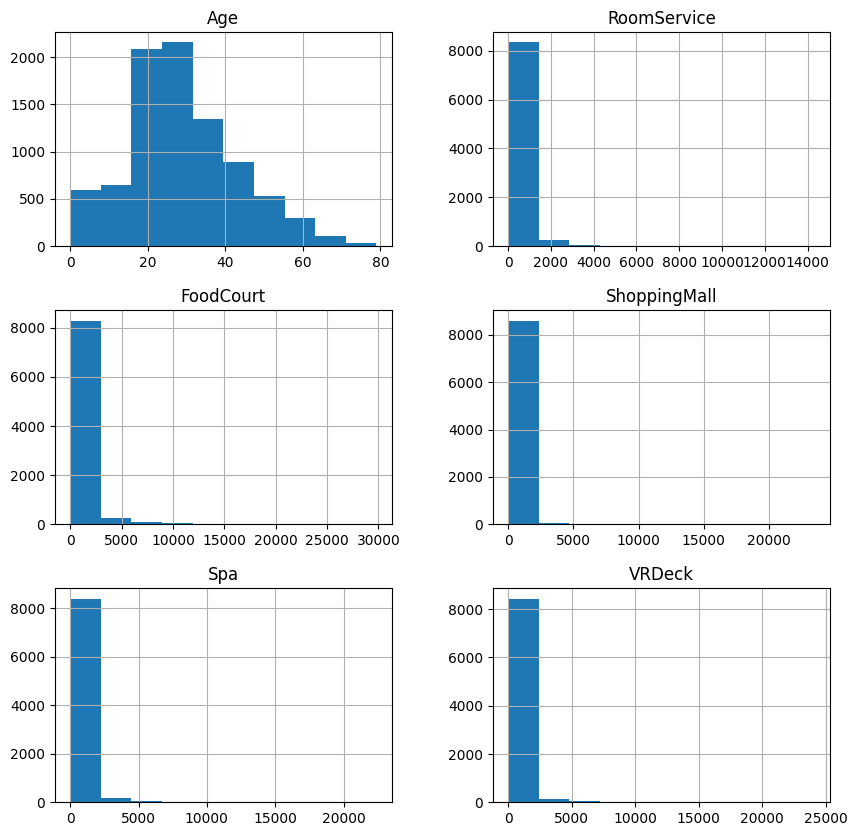

In [654]:
df.hist(figsize=(10,10))

In [655]:
#call function to convert string data into numerical

In [656]:
X,y=df.drop("Transported",axis=1),df["Transported"]

In [657]:
# plotting between destination and Homeplanet
df_temp=pd.read_csv("train.csv")
df_temp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [658]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_temp["HomePlanetcode"]=le.fit_transform(df_temp['HomePlanet'])
df_temp["Destinationcode"]=le.fit_transform(df_temp['Destination'])
df_temp.nunique()


PassengerId        8693
HomePlanet            3
CryoSleep             2
Cabin              6560
Destination           3
Age                  80
VIP                   2
RoomService        1273
FoodCourt          1507
ShoppingMall       1115
Spa                1327
VRDeck             1306
Name               8473
Transported           2
HomePlanetcode        4
Destinationcode       4
dtype: int64

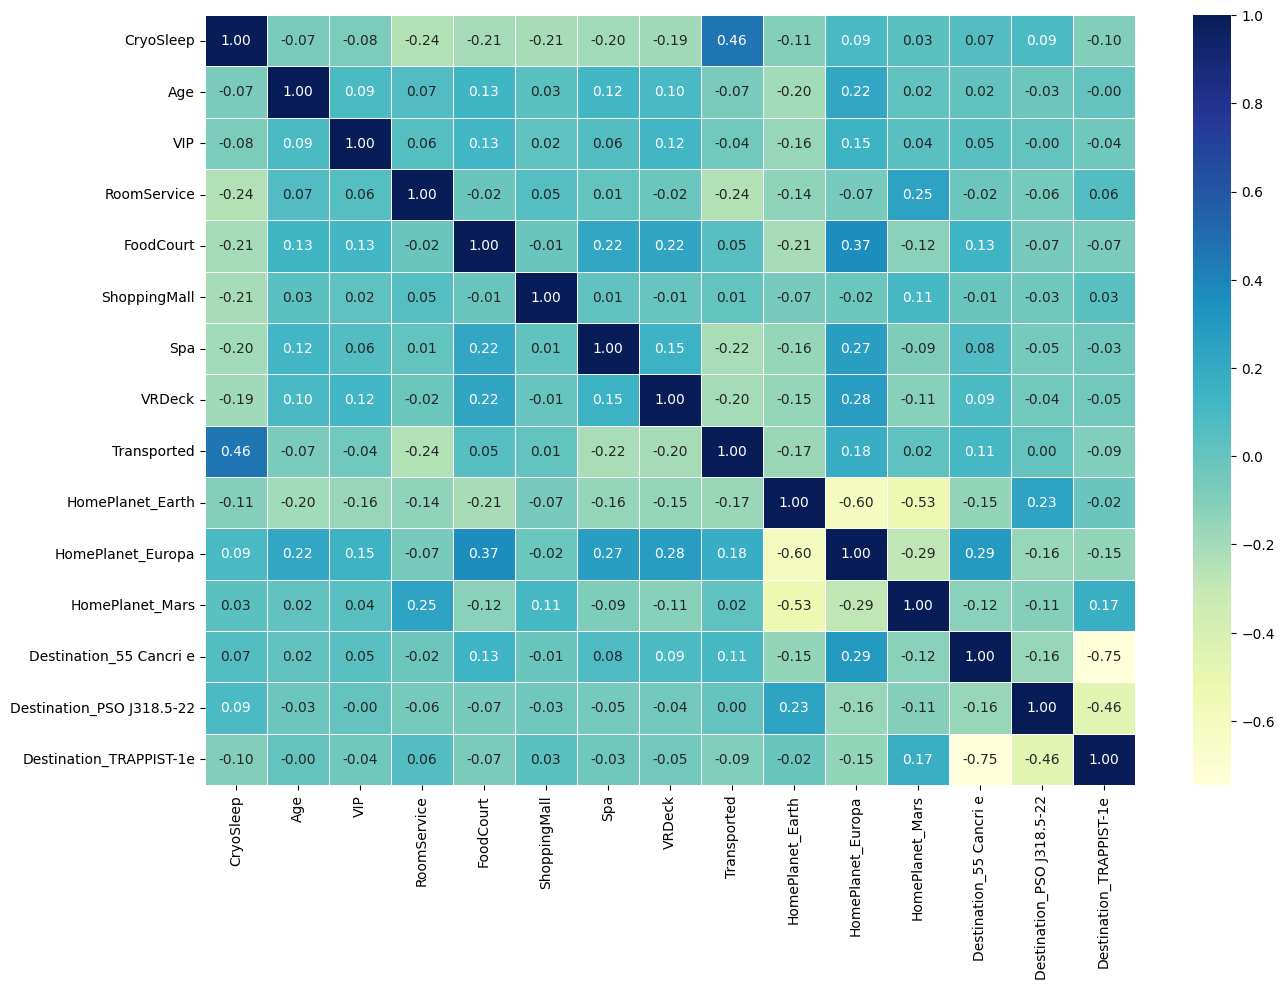

In [659]:

corr_matrix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu")

In [660]:
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [661]:
models={
    "logistic regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier(),
    "LinearSVC":LinearSVC(),
    "xgboost":xgb.XGBClassifier()}

# create a function to fit and score the model
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    # set random seed
    np.random.seed(42)
    # loop through models
    model_scores={}
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train,Y_train)
        # evaluate the model and appends its score to model_scores
        model_scores[name] = model.score(X_test,Y_test)

    return model_scores

In [662]:
model_scores=fit_and_score(models,X_train,X_test,Y_train,Y_test)
model_scores

c:\Users\kirol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.7751581368602645,
 'KNN': 0.7682576193214491,
 'RandomForest': 0.780333525014376,
 'LinearSVC': 0.7717078780908568,
 'xgboost': 0.7849338700402531}

In [663]:

clf=LinearSVC(random_state=42)
k_folds=KFold(n_splits=5)
scores=cross_val_score(clf,X_train,Y_train,cv=k_folds)
print("cross validation scores: ",scores)
print("Average CV score: ",scores.mean())
print("Number of CV scores used in Average: ",len(scores))

cross validation scores:  [0.77929547 0.78864127 0.79007908 0.7821711  0.79496403]
Average CV score:  0.7870301889329657
Number of CV scores used in Average:  5


In [664]:
xg_grid_new={'max_depth':3,'learning_rate':0.2,'n_estimators':100,'objective':'binary:logistic','eval_metric': 'rmse'}
#Best parameters: {'max_depth': 3, 'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'eval_metric': 'rmse'}

model=xgb.XGBClassifier(objective='binary:logistic',
                        max_depth=5,
                        learning_rate=0.1,
                        n_estimators=200,
                       )
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [665]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [666]:
accuracy=accuracy_score(Y_test, y_pred)
print("accuracy_score: ", accuracy)

print(classification_report(Y_test, y_pred))

accuracy_score:  0.7987349051178838
              precision    recall  f1-score   support

       False       0.82      0.77      0.79       861
        True       0.78      0.83      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [667]:
xg_grid_se=RandomizedSearchCV(xgb.XGBClassifier(),
                              param_distributions=xg_grid,
                              cv=5,
                              n_iter=10,
                              )

# fit random hyperparameter search model for logistic regression
xg_grid_se.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300]})

In [668]:
best_model=xg_grid_se.best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [669]:
y_pred=xg_grid_se.predict(X_test)

In [670]:
accuracy=accuracy_score(Y_test, y_pred)
print("accuracy_score: ", accuracy)
print(classification_report(Y_test, y_pred))

accuracy_score:  0.7866589994249569
              precision    recall  f1-score   support

       False       0.81      0.74      0.77       861
        True       0.76      0.84      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

